# Mini project DWDM (Healthcare Domain )
### PE34  Abhijeet Jha 
### PE42  Tanmay kapoor
### PE41  Apoorv Agnihotri
### PE40  Yash Agrawal 

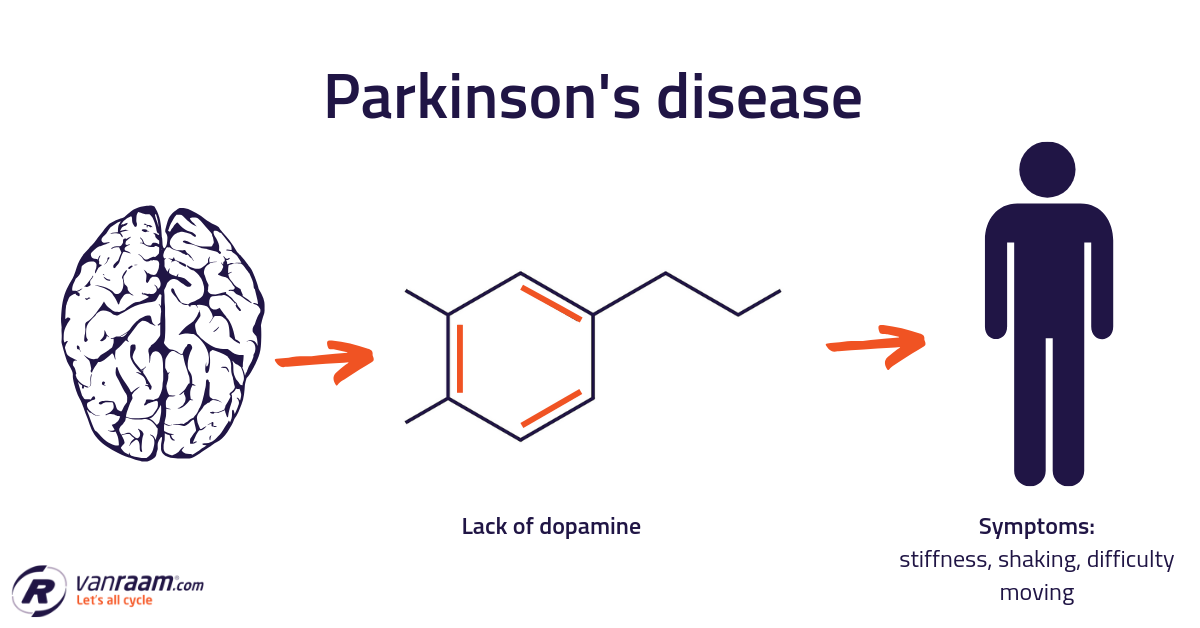

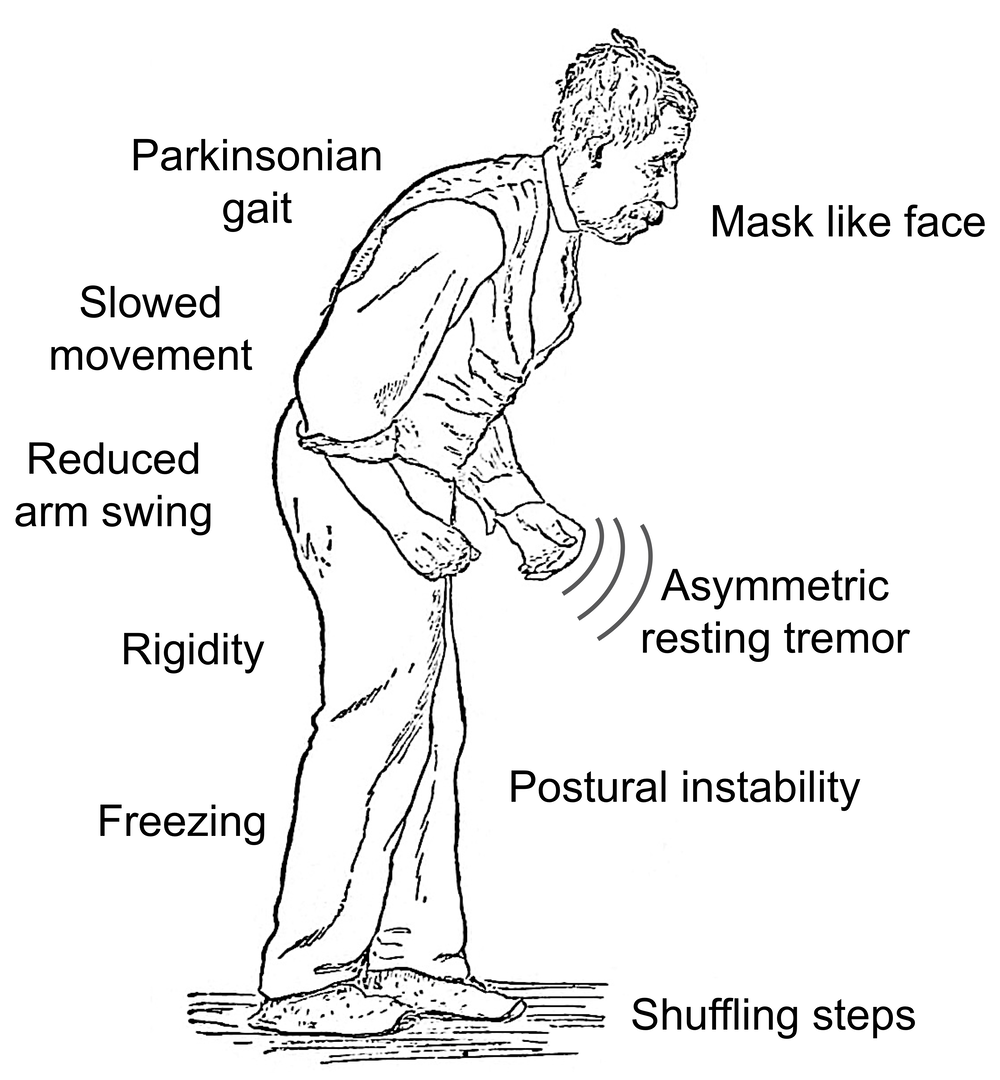

# Parkinson's Disease Analysis & Prediction using Ml modelling.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
parkinson_data = pd.read_csv("parkinsons_data.csv")

In [3]:
parkinson_data.head(500)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,74,0,92.5520,17.012,26.012,0.00398,0.000032,0.00170,0.00240,...,0.402,0.02268,0.02697,0.03640,0.06803,0.026708,19.867,0.54230,0.68159,0.16814
496,4,74,0,101.7200,17.218,26.218,0.00322,0.000026,0.00133,0.00173,...,0.245,0.01499,0.01728,0.02340,0.04497,0.008943,21.981,0.63139,0.62970,0.14241
497,4,74,0,107.7300,17.353,26.353,0.01396,0.000116,0.00822,0.00694,...,1.237,0.08104,0.07309,0.08506,0.24311,0.101620,12.933,0.64875,0.71605,0.33310
498,4,74,0,114.7000,17.510,26.510,0.00316,0.000026,0.00138,0.00171,...,0.362,0.02109,0.02437,0.03116,0.06327,0.020840,21.093,0.65200,0.64222,0.16473


In [4]:
#create a copy to manipulate it further .
data = parkinson_data.copy()

<AxesSubplot:>

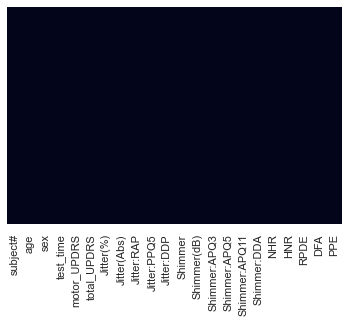

In [5]:
#DATA CLEANING VIA heatmap
import seaborn as sns 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [6]:
data.isnull().sum()

subject#         0
age              0
sex              0
test_time        1
motor_UPDRS      1
total_UPDRS      1
Jitter(%)        1
Jitter(Abs)      1
Jitter:RAP       1
Jitter:PPQ5      1
Jitter:DDP       1
Shimmer          1
Shimmer(dB)      1
Shimmer:APQ3     1
Shimmer:APQ5     1
Shimmer:APQ11    1
Shimmer:DDA      1
NHR              1
HNR              1
RPDE             1
DFA              1
PPE              1
dtype: int64

In [9]:
data=data.dropna(axis = 0, how ='any') 

In [10]:
data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [34]:
#Generally according to medical diagnosis data , men have significantly higher relative risk being 1.5 times greater than women.
#here 0 maps to Gender(Men) and 1 maps to Gender(women)
data["sex"].value_counts()
pd.crosstab(data["sex"], columns="count", normalize=True)

col_0,count
sex,
0,0.682213
1,0.317787


<AxesSubplot:xlabel='sex', ylabel='count'>

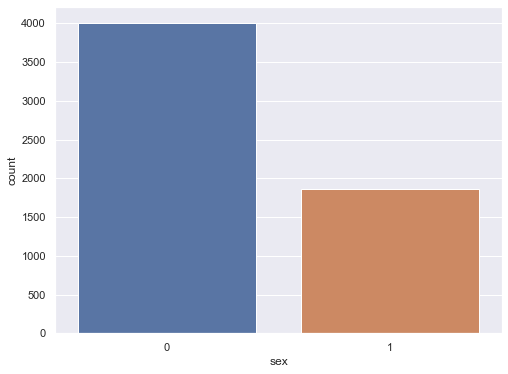

In [35]:
# here you can see this visually through countplot a type of histogram .
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="sex", data=data)

Text(0.5, 1.0, 'sex vs age')

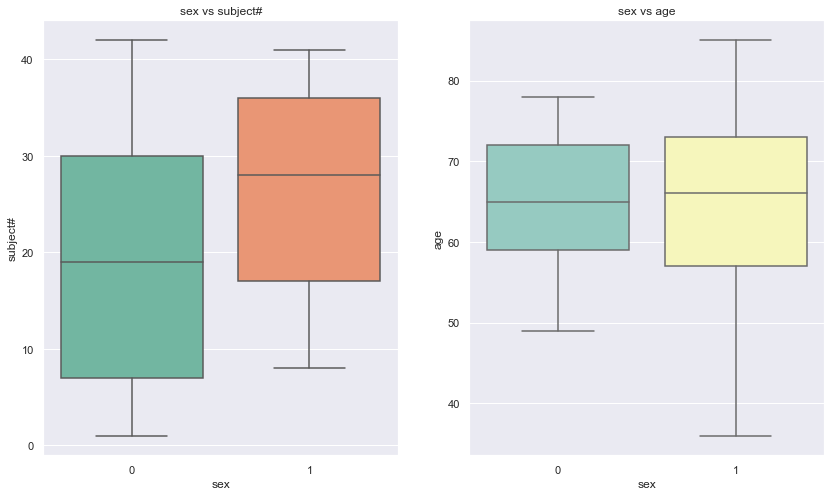

In [36]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(x="sex", y="subject#", data=data, ax=axis1, palette="Set2")
axis1.set_title("sex vs subject#")

sns.boxplot(x="sex", y="age", data=data, ax=axis2, palette="Set3")
axis2.set_title("sex vs age")

Attribute Information:

Matrix column entries (attributes): 
name - ASCII subject name and recording number 
MDVP:Fo(Hz) - Average vocal fundamental frequency 
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 
NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures 
DFA - Signal fractal scaling exponent 
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [37]:
parkinson_data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [38]:
data.columns = ['status', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status         5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [39]:
data.describe()

,status,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [40]:
data["status"] %= 2
data.describe()

,status,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,0.512000,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,0.499899,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,0.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,0.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,1.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,1.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,1.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


# Visualization of data features vs the status of patients.

Text(0.5, 1.0, 'status vs DFA')

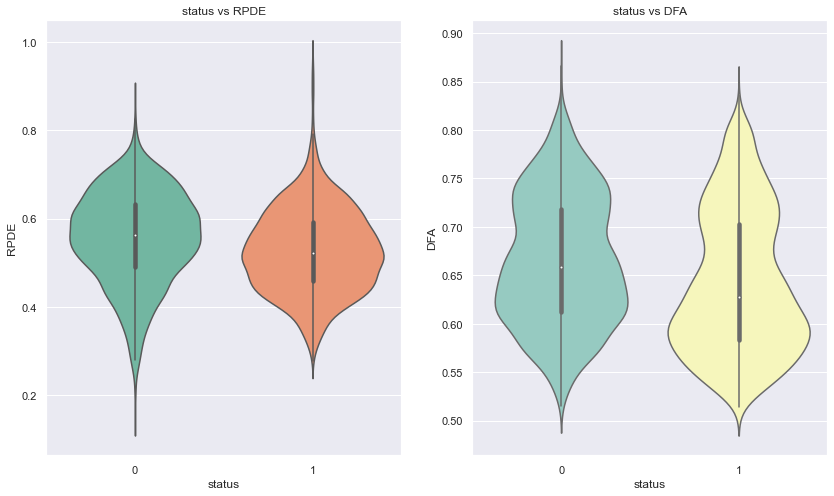

In [41]:

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.violinplot(x="status", y="RPDE", data=data, ax=axis1, palette="Set2")
axis1.set_title("status vs RPDE")

sns.violinplot(x="status", y="DFA", data=data, ax=axis2, palette="Set3")
axis2.set_title("status vs DFA")

Text(0.5, 1.0, 'status vs HNR')

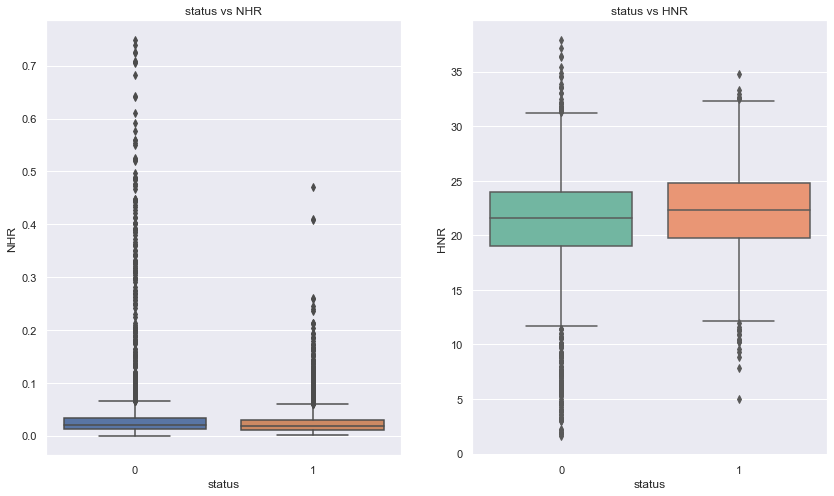

In [42]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(x="status", y="NHR", data=data, ax=axis1)
axis1.set_title("status vs NHR")

sns.boxplot(x="status", y="HNR", data=data, ax=axis2, palette="Set2")
axis2.set_title("status vs HNR")

# Data preprocessing


    1. Split data to Features and label.
    2. Scale features to the same scale
    3. Split data into training and testing portion

#  Features and Labels

In [43]:
labels = parkinson_data.iloc[:, 0].values
features = parkinson_data.iloc[:, 1:].values
print(labels)

[ 1  1  1 ... 42 42 42]


In [65]:
print(features.shape)
print(labels[0])

(5875, 21)
1


# Feature Scaling using standard scaler

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scled_features = scaler.fit_transform(features)


# Feature Importance using ensemble technique .

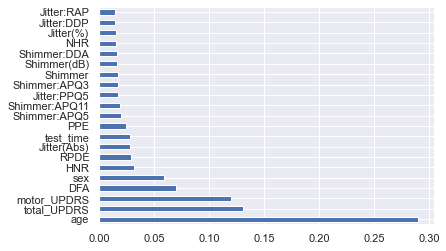

In [68]:
#Ensemble technique to see feature importance 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(scled_features,labels)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=parkinson_data.iloc[:, 1:].columns)
feat_importances.nlargest(21).plot(kind='barh')
plt.show()


# Principal Component Analysis (Dimension Reduction technique )

In [47]:
from sklearn.decomposition import PCA
%matplotlib inline

In [48]:
#we have 21 features initially now we can reduce it to n a lower Dimension
# we had 12 warnings and 11 correlated features , hence we can reduce the dimension from 21 to 10 .
pca = PCA(n_components=10)

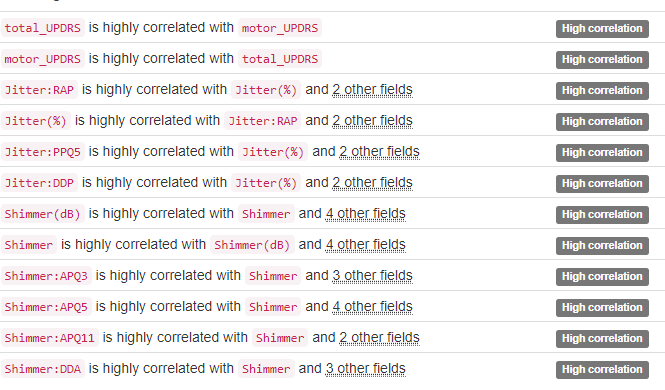

In [50]:
#finally we can train the unsupervised algo with the scaled data .
pca.fit(scled_features)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 10 principal components.


In [51]:
features_pca = pca.transform(scled_features)

In [52]:
#intially had 21 features where some of them were correlated .
scled_features.shape

(5875, 21)

In [53]:
#now there are only 10 analysed features with no correlation.
features_pca.shape

(5875, 10)

Text(0, 0.5, 'Second Principal Component')

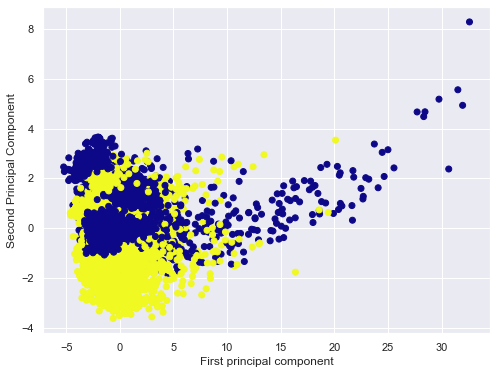

In [55]:
# lets plot some of the features witn each other to see the distribution of data .
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0],features_pca[:,1],c=data['status'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

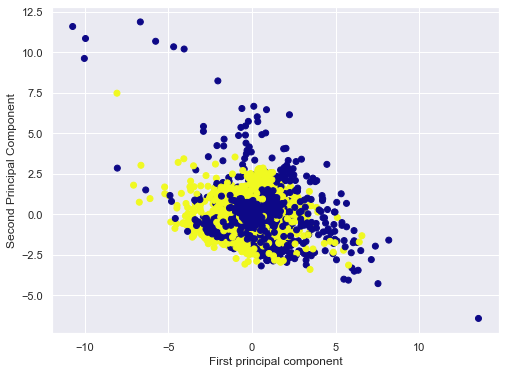

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,2],features_pca[:,3],c=data['status'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

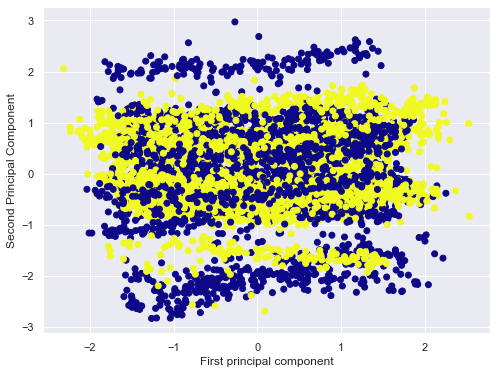

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,4],features_pca[:,5],c=data['status'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### Splitting data into Training and test portions

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features_pca, labels, test_size=0.3)

In [75]:
print("X_train shape = {}".format(X_train.shape))
print("y_train shape = {}".format(y_train.shape))
print("X_test shape =  {}".format(X_test.shape))
print("y_test shape =  {}".format(y_test.shape))

X_train shape = (4112, 10)
y_train shape = (4112,)
X_test shape =  (1763, 10)
y_test shape =  (1763,)


# Final Modelling and Predictions.

# KNN Algorithm

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
print("KNN with k=5 got {}% accuracy on the test set.".format(accuracy_score(y_test, knn.predict(X_test))*100))

KNN with k=5 got 88.31537152580829% accuracy on the test set.


# KNN Grid search

In [81]:
params_dict = {'n_neighbors':[3, 5, 9, 15], 'p':[1, 2, 3], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gs = GridSearchCV(knn, param_grid=params_dict, verbose=10, cv=10)

In [82]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.908, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.898, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.912, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.920, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.917, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.866, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.912, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.920, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.912, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.881, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.871, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.876, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.895, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.910, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.895, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.852, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.903, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.898, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.910, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.864, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=3 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=3, score=0.852, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=3 ..............................
[CV] .

[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.881, total=   0.0s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.839, total=   0.0s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.895, total=   0.0s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.893, total=   0.0s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.893, total=   0.0s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.881, total=   0.0s
[CV] algorithm=auto, n_neighbors=9, p=3 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=3, score=0.837, total=   0.2s
[CV] algorithm=auto, n_neighbors=9, p=3 ..............................
[CV] .

[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.895, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.895, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.852, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.903, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.898, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 ...........

[CV]  algorithm=ball_tree, n_neighbors=9, p=1, score=0.900, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.859, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.862, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.873, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.888, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.881, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.839, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 ...........

[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.881, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.871, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.876, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.895, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.910, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.895, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.852, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................

[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.900, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.859, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.862, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.873, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.888, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.881, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.839, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................

[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.871, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.876, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.895, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.910, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.895, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.852, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.903, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] .

[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.910, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.900, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] . algorithm=brute, n_neighbors=9, p=2, score=0.859, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] . algorithm=brute, n_neighbors=9, p=2, score=0.862, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] . algorithm=brute, n_neighbors=9, p=2, score=0.873, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] . algorithm=brute, n_neighbors=9, p=2, score=0.888, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] . algorithm=brute, n_neighbors=9, p=2, score=0.881, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 9, 15], 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [83]:
print(gs.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')


In [84]:
new_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')
new_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=1,
                     weights='uniform')

In [85]:
print("KNN - fine tuned, got {}% accuracy on the test set.".format(accuracy_score(y_test, new_knn.predict(X_test))*100))

KNN - fine tuned, got 91.49177538287012% accuracy on the test set.


# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr = LogisticRegression(max_iter = 120000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
print("Logistic regression - default, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr.predict(X_test))*100))

Logistic regression - default, got 92.05899035734544% accuracy on the test set.


In [92]:
lr_tuned = LogisticRegression(C=1000, penalty='l2', max_iter = 120000)
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
print("Logistic regression - tuned, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr_tuned.predict(X_test))*100))

Logistic regression - tuned, got 97.22064662507091% accuracy on the test set.


# Tree and forest classifiers

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(n_estimators=350)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
print("Random forest classifier, got {}% accuracy on the test set.".format(accuracy_score(y_test, rfc.predict(X_test))*100))

Random forest classifier, got 95.34883720930233% accuracy on the test set.
